<a href="https://colab.research.google.com/github/vipulkg30k/PlaceProj/blob/main/toyProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
import matplotlib.pyplot as plt

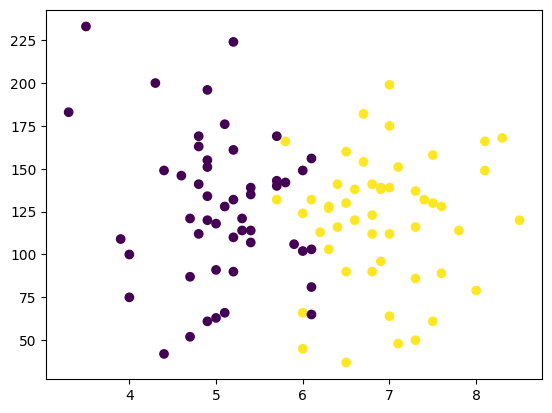

In [ ]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [ ]:
X = df.iloc[:, 0:2]
Y = df.iloc[:,-1]

In [ ]:
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [ ]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
xTrain = scaler.fit_transform(xTrain)
xTrain

array([[ 0.81119302, -0.97602424],
       [ 0.46270914,  0.25131163],
       [-0.5130457 ,  0.68964587],
       [-0.93122635, -1.15135793],
       [-1.349407  ,  0.77731271],
       [ 0.77634463,  1.12798011],
       [-0.47819732, -0.27468946],
       [ 1.47331238, -0.71302369],
       [-0.86152958, -0.88835739],
       [-0.96607474, -0.97602424],
       [ 0.95058657,  1.12798011],
       [-1.59334571, -0.18702261],
       [ 0.21877043,  0.07597793],
       [-1.03577151,  0.51431217],
       [-0.7918328 , -0.01168891],
       [-1.17516506, -0.71302369],
       [ 1.43846399,  1.3033138 ],
       [ 1.1248285 ,  0.42664532],
       [-1.41910377, -0.80069054],
       [ 0.00968011, -2.2033601 ],
       [-0.09486505, -0.71302369],
       [-0.82668119,  0.86497956],
       [-0.2342586 ,  0.68964587],
       [-0.44334893,  1.82931489],
       [-0.58274248, -0.01168891],
       [ 0.74149624,  0.07597793],
       [ 1.36876721, -0.97602424],
       [-1.31455861, -0.53769   ],
       [ 0.67179947,

In [ ]:
xTest = scaler.transform(xTest)
xTest

array([[-1.45395216,  0.07597793],
       [ 1.50816076,  0.68964587],
       [-1.21001345, -0.80069054],
       [ 0.8460414 ,  0.60197902],
       [ 0.32331559, -1.06369108],
       [-0.72213603,  0.86497956],
       [-0.65243925, -1.85269271],
       [ 1.33391883, -1.41435847],
       [-1.24486184,  0.07597793],
       [ 0.49755753,  0.86497956]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
clf.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
yPred = clf.predict(xTest)
yPred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yTest,yPred)

0.9

<Axes: >

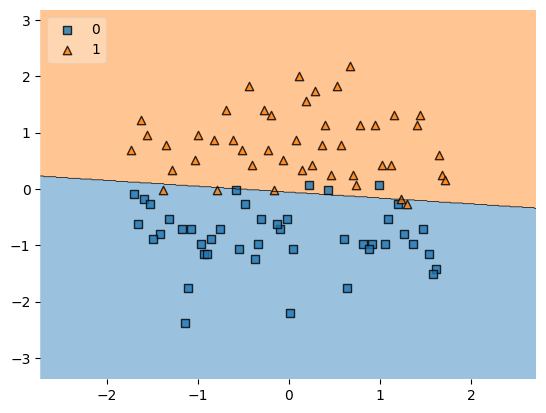

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=xTrain, y=yTrain.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))